# Gram-Schmidt Process

## Intro and Intuition

The Gram-Schmidt process is a way to orthonormalize an arbitrary basis. Why does this matter? Although any basis is "good", having an orthonormal basis is the easiest basis to work with as it's super easy to obtain coefficients of a vector with respect to this orthonormal basis by calculating the inner product of the vector with each orthonormal vector in the basis:
$\vec{v} = \langle \vec{v}, \vec{e}_1 \rangle \vec{e}_1 + \langle \vec{v}, \vec{e}_2 \rangle \vec{e}_2 + \langle \vec{v}, \vec{e}_3 \rangle \vec{e}_3$.

Below is a visualization of the Gram-Schmidt process that will hopefully aid intuition:
![Gram-Schmidt gif](https://upload.wikimedia.org/wikipedia/commons/e/ee/Gram-Schmidt_orthonormalization_process.gif)

## Confirming a Basis

In [1]:
from IPython.display import display
from sympy import *
init_printing()

Now we choose a set of vectors that form a basis. Recall that since this set of vectors form a basis for a space, each vector represents a single direction in said space.

In [2]:
v1 = Matrix([1, 1, 1, 1])
v2 = Matrix([0, 1, 1, 1])
v3 = Matrix([0, 0, 1, 1])
basis = [v1, v2, v3]
n = len(basis)
m = len(v1)

Let's verify linear independence by putting the transpose of the vectors in a matrix and row-reducing it.

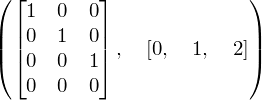

In [3]:
M = Matrix([[1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 1, 1]])
M.rref()

Cool, looks like we have pivots in each column so this set of vectors is linearly independent and we know it also spans $\mathbb{R}^3$ by the Rank-Nullity Theorem so we've got ourselves an arbirary basis!

## The Algorithm
Now to convert this basis into an orthonormal basis using the Gram-Schmidt Process. Mathematically speaking, the process is as follows:
![Gram-Schmidt algo](https://en.wikipedia.org/api/rest_v1/media/math/render/svg/f0bb38a101197ba3cfcf1341b87c0787a7a57bb3)
with the projection equation being:
![projection equation](https://en.wikipedia.org/api/rest_v1/media/math/render/svg/c0221c78b42c32d0685273dac12d923fa9048051)


The first step is easy - the first vector in your arbitrary basis is going to be the first orthogonal vector.

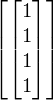

In [4]:
orthogonal_vectors = []
orthogonal_vectors.append(basis[0])
orthogonal_vectors

Now we need to project each vector in the arbitrary basis onto the subspace and only keep the orthgonal piece of the vector by subtracting the projection from the vector.

---------------------------------------------------
original vector:


projection onto subspace:


orthogonal vector:


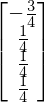

---------------------------------------------------
original vector:


projection onto subspace:


orthogonal vector:


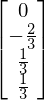

---------------------------------------------------


In [5]:
# orthogonal projection onto subspace
gram_schmidt_process_log = []
for vector in basis[1:]:
    # initial projection vector - this is just a programming thing
    projection_onto_subspace = zeros(m, 1)
    # perform the projection process
    for orthogonal_vector in orthogonal_vectors:
        projection_onto_subspace = projection_onto_subspace + \
                                   (vector.dot(orthogonal_vector) / orthogonal_vector.dot(orthogonal_vector)) \
                                   * orthogonal_vector        
    orthogonal_vector = vector - projection_onto_subspace
    orthogonal_vectors.append(orthogonal_vector)
    gram_schmidt_process_log.append([vector, projection_onto_subspace, orthogonal_vector])
    
print('---------------------------------------------------')
for vector, projection_onto_subspace, orthogonal_vector in gram_schmidt_process_log:
    print("original vector:")
    display(vector)
    print("projection onto subspace:")
    display(projection_onto_subspace)
    print("orthogonal vector:")
    display(orthogonal_vector)
    print('---------------------------------------------------')

We now have an orthogonal set of vectors:

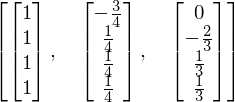

In [6]:
orthogonal_vectors

To make this set of vectors orthonormal, all we need to do is divide each vector by its magnitude/norm.

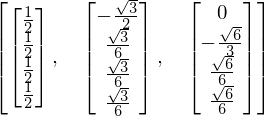

In [7]:
orthonormal_vectors = []
for orthogonal_vector in orthogonal_vectors:
    orthogonal_vector_length = orthogonal_vector.norm()
    orthonormal_vectors.append(orthogonal_vector / orthogonal_vector_length)
    
orthonormal_vectors

Awesome! We now have an orthonormal basis to work with all created from plain-jane basis.

Now the cool thing is that sympy has all this built into one function. Then why did we write it all by hand? So that we could truly understand how the Gram-Schmidt algorithm worked. And now that we do, we can let someone else's code handle the work. Let's see this in action:

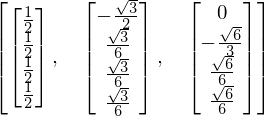

In [8]:
basis = [v1, v2, v3]
orthonormal_basis = GramSchmidt(basis, True)
orthonormal_basis

Looks like we got the same results and with far less code! The "True" parameter tells sympy to normalize the returned vectors instead of just leaving them orthogonalized.